In [4]:
# Importing modules
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd

# Reading in datasets/book1.csv
dataset1 = "dataset1.csv"
df = pd.read_csv(dataset1)

# Printing out the head of the dataset
# ... YOUR CODE FOR TASK 1 ...
df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [5]:
# Importing modules
# ... YOUR CODE FOR TASK 2 ...

import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

# Iterating through the DataFrame to add edges
# ... YOUR CODE FOR TASK 3 ...
for _, edge in df.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['dataset1.csv','dataset2.csv', 'dataset3.csv', 'dataset4.csv', 'dataset5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [11]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 2
#deg_cen_book3 = nx.degree_centrality(books[2])

# Calculating the degree centrality of book 4
#deg_cen_book4 = nx.degree_centrality(books[3])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])


# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
#sorted_deg_cen_book2 = sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
#sorted_deg_cen_book3 = sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
#sorted_deg_cen_book4 = sorted(deg_cen_book4.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
# ... YOUR CODE FOR TASK 4 ...

sorted_deg_cen_books = [sorted_deg_cen_book1, sorted_deg_cen_book5]
for sorted_deg_cen_book in sorted_deg_cen_books:
    print(sorted_deg_cen_book)
    print()


[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]

[('Jaime-Lannister', 0.23443223443223443), ('Cersei-Lannister', 0.21978021978021978), ('Brienne-of-Tarth', 0.10256410256410256), ('Tyrion-Lannister', 0.09523809523809523), ('Margaery-Tyrell', 0.09157509157509157), ('Sansa-Stark', 0.0879120879120879), ('Tommen-Baratheon', 0.0879120879120879), ('Samwell-Tarly', 0.07326007326007326), ('Stannis-Baratheon', 0.07326007326007326), ('Petyr-Baelish', 0.0695970695970696)]



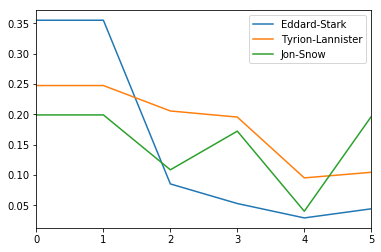

In [13]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
# ... YOUR CODE FOR TASK 5 ..
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow',]].plot()

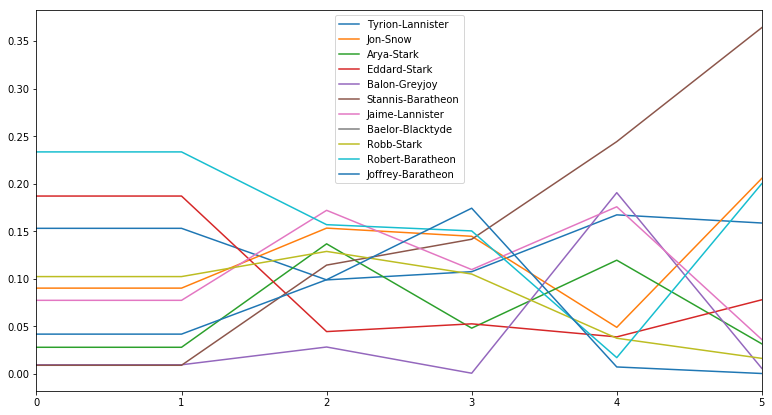

In [14]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
# ... YOUR CODE FOR TASK 6 ...
betweenness_evol_df[list_of_char].plot(figsize=(13,7))

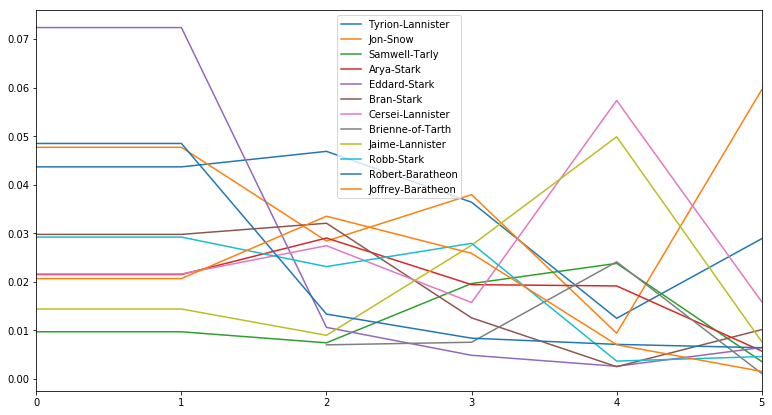

In [15]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
# ... YOUR CODE FOR TASK 7 ...
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

In [16]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)
# Calculating the correlation
# ... YOUR CODE FOR TASK 8 ...
cor.T.corr()

,0,1,2
0,1.000000,0.656856,0.946802
1,0.656856,1.000000,0.720553
2,0.946802,0.720553,1.000000


In [17]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
# ... YOUR CODE FOR TASK 9 ...
print(p_rank, b_cent, d_cent)

Cersei-Lannister Stannis-Baratheon Jaime-Lannister
